[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  7 of 7 completed


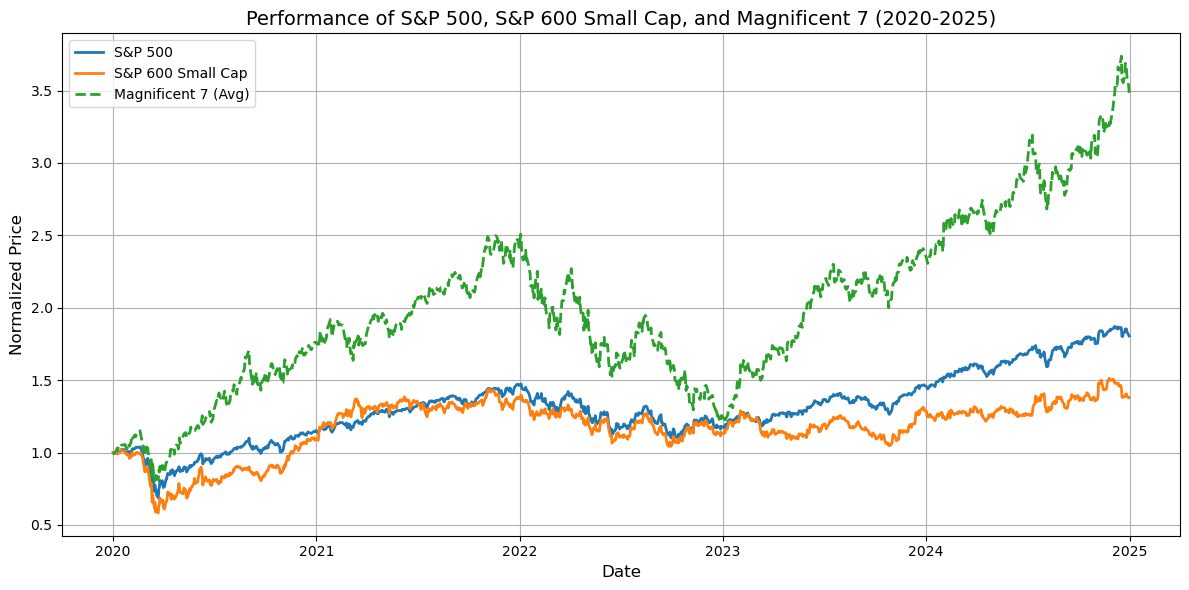

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define tickers
sp500_ticker = "^GSPC"  # S&P 500
sp600_ticker = "^SP600"  # S&P 600 Small Cap
magnificent7_tickers = ["NVDA", "META", "TSLA", "AMZN", "GOOG", "MSFT", "AAPL"]

# Define start and end dates
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download data for SP500 and SP600
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]

# Download data for Magnificent 7 and calculate average performance
magnificent7_data = yf.download(magnificent7_tickers, start=start_date, end=end_date)["Adj Close"]
magnificent7_mean = magnificent7_data.mean(axis=1)

# Normalize data for comparison
sp500_norm = sp500_data / sp500_data.iloc[0]
sp600_norm = sp600_data / sp600_data.iloc[0]
magnificent7_norm = magnificent7_mean / magnificent7_mean.iloc[0]

# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(sp500_norm, label="S&P 500", linewidth=2)
plt.plot(sp600_norm, label="S&P 600 Small Cap", linewidth=2)
plt.plot(magnificent7_norm, label="Magnificent 7 (Avg)", linewidth=2, linestyle="--")
plt.title("Performance of S&P 500, S&P 600 Small Cap, and Magnificent 7 (2020-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Normalized Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


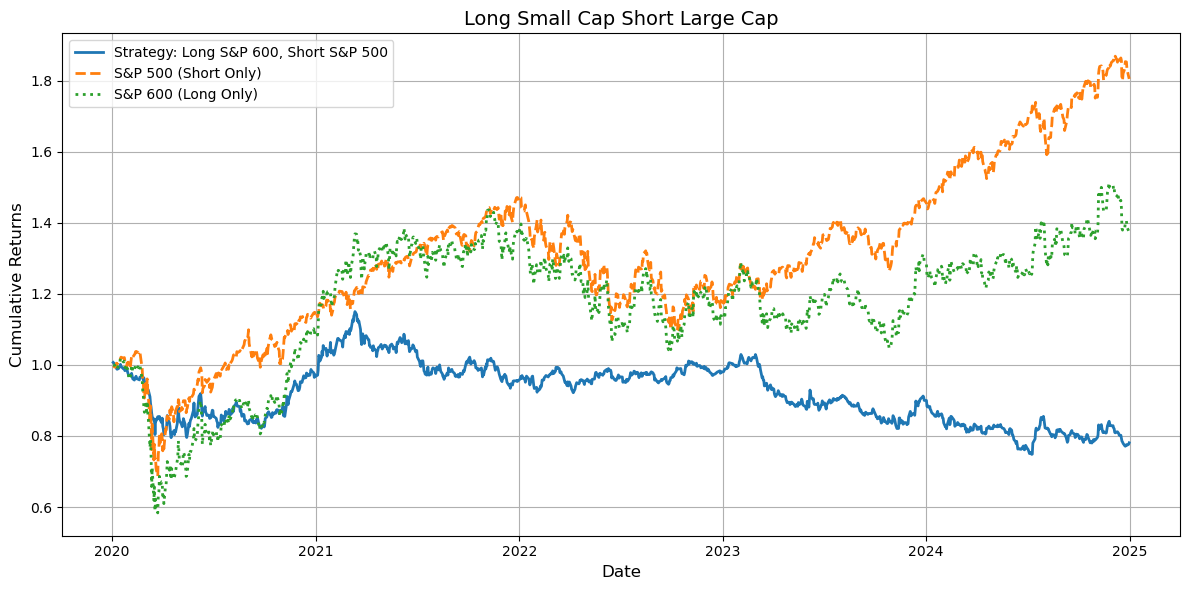

Annualized Strategy Return: -0.03809692282093566
Annualized Strategy Volatility: 0.15178186991052403
Sharpe Ratio: -0.2509978487114036


In [13]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers
sp500_ticker = "^GSPC"  # S&P 500
sp600_ticker = "^SP600"  # S&P 600 Small Cap

# Define start and end dates
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download data
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
sp500_returns = sp500_data.pct_change()
sp600_returns = sp600_data.pct_change()

# Strategy: Long S&P 600, Short S&P 500
strategy_returns = sp600_returns - sp500_returns

# Calculate cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod()
sp500_cumulative = (1 + sp500_returns).cumprod()
sp600_cumulative = (1 + sp600_returns).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(strategy_cumulative, label="Strategy: Long S&P 600, Short S&P 500", linewidth=2)
plt.plot(sp500_cumulative, label="S&P 500 (Short Only)", linewidth=2, linestyle="--")
plt.plot(sp600_cumulative, label="S&P 600 (Long Only)", linewidth=2, linestyle=":")
plt.title("Long Small Cap Short Large Cap", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategy statistics
print("Annualized Strategy Return:", strategy_returns.mean() * 252)
print("Annualized Strategy Volatility:", strategy_returns.std() * (252 ** 0.5))
print("Sharpe Ratio:", (strategy_returns.mean() / strategy_returns.std()) * (252 ** 0.5))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  7 of 7 completed


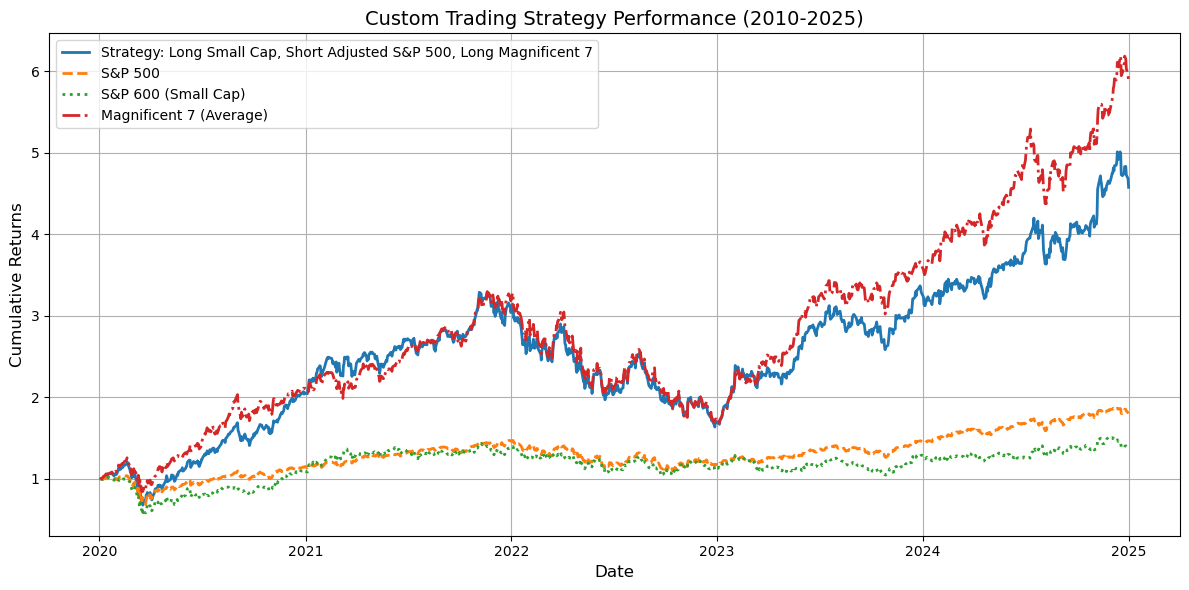

Annualized Strategy Return: 0.36734718117329723
Annualized Strategy Volatility: 0.3518681737880776
Sharpe Ratio: 1.0439909276777681


In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers
sp500_ticker = "^GSPC"  # S&P 500
sp600_ticker = "^SP600"  # S&P 600 Small Cap
magnificent7_tickers = ["NVDA", "META", "TSLA", "AMZN", "GOOG", "MSFT", "AAPL"]

# Define start and end dates
start_date = "2020-01-01"
end_date = "2025-01-01"

# Download data
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)["Adj Close"]
sp600_data = yf.download(sp600_ticker, start=start_date, end=end_date)["Adj Close"]
magnificent7_data = yf.download(magnificent7_tickers, start=start_date, end=end_date)["Adj Close"]

# Calculate daily returns
sp500_returns = sp500_data.pct_change()
sp600_returns = sp600_data.pct_change()
magnificent7_returns = magnificent7_data.pct_change()

# Function to calculate yearly weights based on market cap
def calculate_weights(prices):
    market_caps = prices.iloc[-1]  # Use last available price as proxy for market cap
    total_market_cap = market_caps.sum()
    return market_caps / total_market_cap

# Initialize yearly rebalancing
rebalance_dates = sp500_data.resample('Y').last().index
weights = {}

for date in rebalance_dates:
    # Get last available data for the year
    if date in magnificent7_data.index:
        year_data = magnificent7_data.loc[:date]
        magnificent7_weights = calculate_weights(year_data)
        sp500_weight = 1 - magnificent7_weights.sum()
        weights[date] = {"magnificent7": magnificent7_weights, "sp500": sp500_weight}

# Adjust S&P 500 to exclude Magnificent 7
sp500_adjusted_returns = sp500_returns.copy()
for date in weights.keys():
    if date in sp500_adjusted_returns.index:
        magnificent7_weighted_return = (magnificent7_returns.loc[date] * weights[date]["magnificent7"]).sum()
        sp500_adjusted_returns.loc[date] -= magnificent7_weighted_return

# Strategy: Long S&P 600, Short adjusted S&P 500, Long Magnificent 7
strategy_returns = sp600_returns - sp500_adjusted_returns + magnificent7_returns.mean(axis=1)

# Calculate cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod()
sp500_cumulative = (1 + sp500_returns).cumprod()
sp600_cumulative = (1 + sp600_returns).cumprod()
magnificent7_cumulative = (1 + magnificent7_returns.mean(axis=1)).cumprod()

# Plot the strategy performance
plt.figure(figsize=(12, 6))
plt.plot(strategy_cumulative, label="Strategy: Long Small Cap, Short Adjusted S&P 500, Long Magnificent 7", linewidth=2)
plt.plot(sp500_cumulative, label="S&P 500", linewidth=2, linestyle="--")
plt.plot(sp600_cumulative, label="S&P 600 (Small Cap)", linewidth=2, linestyle=":")
plt.plot(magnificent7_cumulative, label="Magnificent 7 (Average)", linewidth=2, linestyle="-.")
plt.title("Custom Trading Strategy Performance (2010-2025)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategy statistics
print("Annualized Strategy Return:", strategy_returns.mean() * 252)
print("Annualized Strategy Volatility:", strategy_returns.std() * (252 ** 0.5))
print("Sharpe Ratio:", (strategy_returns.mean() / strategy_returns.std()) * (252 ** 0.5))
